In [1]:
import psycopg2
import json
# from datetime import datetime as dt
import pandas as pd
import re 
from textblob import TextBlob 

In [2]:
# p="dataisgreat"

In [3]:
# conn = psycopg2.connect(user = "postgres",
#                                   password = f"{p}",
#                                   host = "127.0.0.1",
#                                   port = "3306",
#                                   database = "postgres")

In [4]:
# cursor = conn.cursor()

In [5]:
# tweet_list = []
# followers = []
# cursor.execute("select * from tweets")
# tweets = cursor.fetchall()
# if not tweets:
#     print("empty")
# for row in tweets:
#     for col in row:
#         if type(col) is dict:
#             tweet_list.append(col['text'])
#             followers.append(col['user']['followers_count'])

In [6]:
# Did not want to (also should not) install Cloud SDK and Cloud Proxy SQL on work computer, so grabbed new tweets for testing
import tweepy
from config import *
import datetime as dt

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication Complete")
except:
    print("Authentication Unable to Complete")
    
two_days = (dt.datetime.now() - dt.timedelta(days=3)).strftime("%Y-%m-%d")
one_day = (dt.datetime.now() - dt.timedelta(days=2)).strftime("%Y-%m-%d")

# startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
# endDate =   datetime.datetime(2015, 1, 1, 0, 0, 0)
MAX_TWEETS = 500
tweets = tweepy.Cursor(api.search, q='#election2020', rpp=100, since=two_days, until=one_day).items(MAX_TWEETS)


Authentication Complete


In [8]:
tweet_list = []
followers = []
# cursor.execute("select * from tweets")
# tweets = cursor.fetchall()
if not tweets:
    print("empty")
for row in tweets:
#     for col in row:
#     if type(row) is dict:
    tweet_list.append(row.text)
#     followers.append(row['user']['followers_count'])

In [9]:
remove_list = [r'@[A-Za-z0-9]+','https://t.co[A-Za-z0-9./t.co]+','\n','RT :',r'_[A-Za-z0-9]+','  ']

In [10]:
def clean_tweets(remove_list,tweet_list):
    for item in remove_list:
        tweet_list = [re.sub(item,'',tweet) for tweet in tweet_list]
    return tweet_list

In [11]:
cleaned = clean_tweets(remove_list,tweet_list)
cleaned[:5]

['After being pummeled in his first debate, former NYC Mayor Mike Bloomberg told Boston business leaders that his nex… ',
 ' POLL TIME!!! Please Vote, Comment, &amp; RetweetIFgets the nomination, who would be the best running mate to bo…',
 ' Ep 11: Malpractice Magnifies Mini Mike’s Shortcomings #Election2020 ',
 ' The reason(s) you should all be voting for Bernie...#DemocraticPrimary #Election2020 #Bernie2020#OnlyBernie #BernieBros…',
 " Bernie Sanders continues to lead Nevada's presidential caucuses based on early returns. Catch the complete results as they come in…"]

In [12]:
# tweet_text = pd.DataFrame(tweet)
# tweet_text.rename(columns = {0: "tweets"}, inplace = True)
# tweet_text.head()

In [13]:
sentiment_objects = []
sentiments = []
for each in cleaned:
    sentiments.append(TextBlob(each).polarity)

    
# sentiment_objects.polarity, sentiment_objects
# print(sentiment_objects[0])
    
print(sentiments[:10])

[0.125, 1.0, 0.0, 0.0, 0.1, 0.35, 0.075, 0.3, -0.0625, 1.0]


In [14]:
def result(tweet,keyword_list):
    if any(word in tweet for word in keyword_list):
        return 1
    else:
        return 0

In [15]:
bernie = []
buttigieg = []
biden = []
warren = []
gender = []
age = []
democrat = []
socialist = []
trump = []
delegates = []
extended = []
length = []
for tweet in cleaned:
    tweet_length = len(tweet)
    length.append(tweet_length)
    if tweet_length > 140:
        extended.append(1)
    else:
        extended.append(0)
    delegates.append(result(tweet.lower(),["delegate"]))
    trump.append(result(tweet.lower(),["trump"]))
    socialist.append(result(tweet.lower(),["socialist"]))
    democrat.append(result(tweet.lower(),["democrat","democratic"]))
    age.append(result(tweet.lower(),["old","aging"]))
    gender.append(result(tweet.lower(),["female","woman"]))
    warren.append(result(tweet.lower(),["warren"]))
    biden.append(result(tweet.lower(),["biden"]))
    buttigieg.append(result(tweet.lower(),["buttigieg"]))
    bernie.append(result(tweet.lower(),["bernie"]))
    
    

In [16]:
data = pd.DataFrame({"bernie":bernie,"buttigieg":buttigieg,"biden":biden,"warren":warren,"gender":gender,
             "age":age,"democrat":democrat,"socialist":socialist,"trump":trump,"delegates":delegates,
             "extended":extended,"sentiments":sentiments})

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)


In [18]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.predict(data)[:10]

array([11,  2,  0,  5,  1,  8,  0,  1,  0,  2])

In [20]:
# Check individual Result from 
print((data.iloc[59].values.reshape(1,12)).shape)
kmeans.predict(data.iloc[59].values.reshape(1,12))


(1, 12)


array([0])

In [21]:
data.iloc[75]

bernie        0.000000
buttigieg     0.000000
biden         0.000000
warren        0.000000
gender        0.000000
age           0.000000
democrat      1.000000
socialist     0.000000
trump         0.000000
delegates     0.000000
extended      0.000000
sentiments    0.236667
Name: 75, dtype: float64

In [22]:
for i,row in data.iterrows():
    if row["bernie"] == 1:
        if row["buttigieg"] ==1:
            print(f"Buttigieg: {i}")
        if row["biden"] == 1:
            print(f"Biden: {i}")
        if row["warren"] == 1:
            print(f"Warren: {1}")

Biden: 24
Warren: 1
Biden: 36
Warren: 1
Warren: 1
Buttigieg: 215
Buttigieg: 234
Biden: 332
Biden: 336
Biden: 337
Warren: 1
Biden: 338
Biden: 384


In [23]:
data.iloc[330:336]

,bernie,buttigieg,biden,warren,gender,age,democrat,socialist,trump,delegates,extended,sentiments
330,0,0,0,0,0,0,0,0,0,0,0,0.000000
331,0,0,0,0,0,0,1,0,0,0,0,0.000000
332,1,0,1,0,0,0,0,0,0,0,0,0.500000
333,0,0,0,0,0,0,0,0,0,0,0,0.000000
334,0,0,0,0,0,0,0,0,0,0,0,-0.083333
335,0,0,0,0,0,0,0,0,0,0,0,-0.125000


In [24]:
data_results = data.copy()
data_results['cluster'] = kmeans.predict(data).tolist()

In [25]:
data_results.tail()

,bernie,buttigieg,biden,warren,gender,age,democrat,socialist,trump,delegates,extended,sentiments,cluster
495,0,0,0,0,0,0,0,0,0,0,0,0.19375,8
496,0,0,0,0,0,0,0,0,0,0,0,0.00000,0
497,0,0,0,0,0,0,0,0,0,0,0,0.00000,0
498,0,0,0,0,0,0,0,0,0,0,0,0.00000,0
499,0,0,0,0,0,0,0,0,1,0,0,0.00000,4


In [26]:
import numpy as np
import matplotlib.pyplot as plt


# random example
plt.imshow(np.random.random((50,50)));
plt.colorbar()
# plt.show()

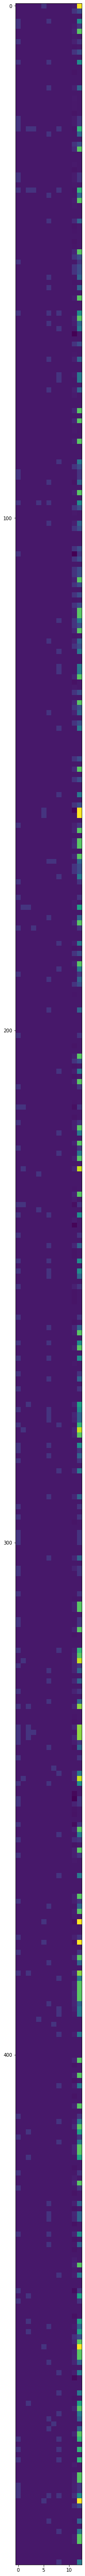

In [27]:
# Hard to see anything, probably shouldn't keep
plt.figure(figsize=(100,100))
plt.imshow(data_results)


In [28]:
data_results.head()


,bernie,buttigieg,biden,warren,gender,age,democrat,socialist,trump,delegates,extended,sentiments,cluster
0,0,0,0,0,0,1,0,0,0,0,0,0.125,11
1,0,0,0,0,0,0,0,0,0,0,0,1.000,2
2,0,0,0,0,0,0,0,0,0,0,0,0.000,0
3,1,0,0,0,0,0,1,0,0,0,0,0.000,5
4,1,0,0,0,0,0,0,0,0,0,0,0.100,1


In [29]:
# See the unique rows in the data with clusters added
unique_rows = data_results.drop_duplicates()

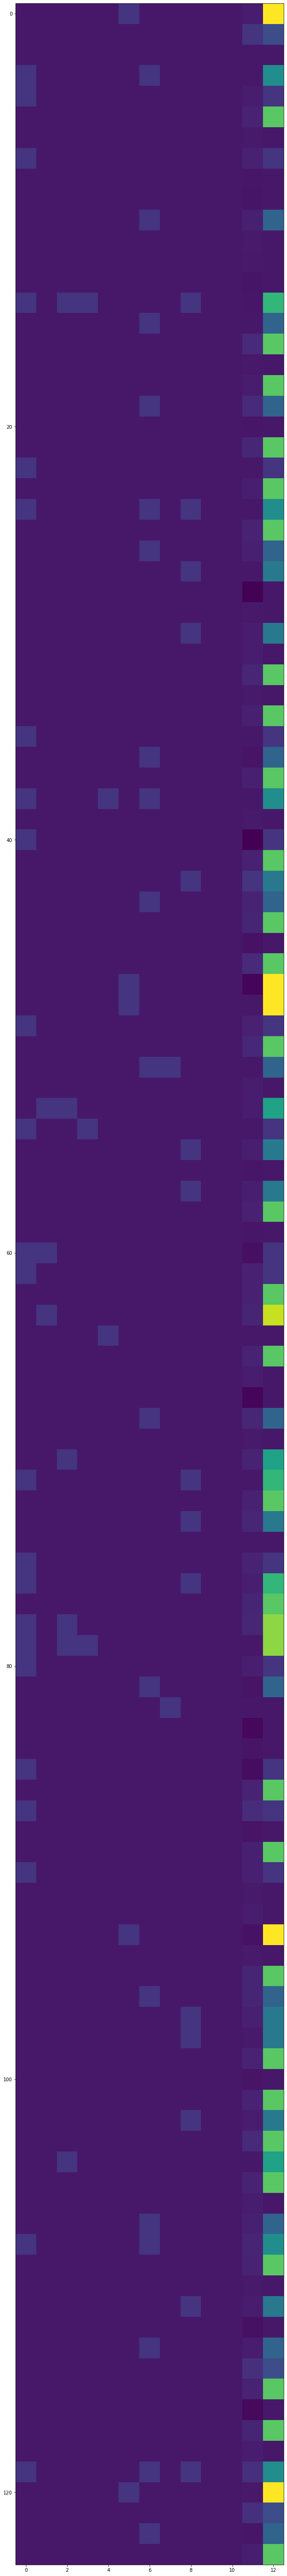

In [30]:
# Still hard to see
plt.figure(figsize=(100,100))
plt.imshow(unique_rows)


In [31]:
# seeing what columns the clusters contain (checking one)
unique_rows.loc[unique_rows['cluster'] == 11].sort_values("sentiments")

,bernie,buttigieg,biden,warren,gender,age,democrat,socialist,trump,delegates,extended,sentiments,cluster
157,0,0,0,0,0,1,0,0,0,0,0,-0.625000,11
374,0,0,0,0,0,1,0,0,0,0,0,-0.200000,11
158,0,0,0,0,0,1,0,0,0,0,0,0.000000,11
487,0,0,0,0,0,1,0,0,0,0,0,0.011458,11
0,0,0,0,0,0,1,0,0,0,0,0,0.125000,11
